In [479]:
# Importing libraries 
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 


warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

#### Test

In [480]:
# reading the training data 
titanicTrain = pd.read_csv("/Users/Babu2017/Downloads/titanic/train.csv") # Directory where the file is stored
titanicTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [481]:
titanicTrain.head(2).T

,0,1
PassengerId,1,2
Survived,0,1
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22,38
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833


In [482]:
# reading the test data
titanicTest = pd.read_csv("/Users/Babu2017/Downloads/titanic/test.csv") # Directory where the file is stored
titanicTest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [483]:
## Make copy of train and test data by dropping unnecessary columns
### These columns are being dropped because these variables either provide no relevance in figuring out the survival rate or there are not enough values for the variable to considered
train_data = titanicTrain.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) 
test_data = titanicTest.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) 
train_data.head() # check everything looks okay

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Exploratory data analysis

In [484]:
train_data['Embarked'].dropna()
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [485]:
###Trying to make plotting easier
def wrangle(dataset):
    # sex {male, female} to {0, 1}
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

    # embarked {S, C, Q} => 3 binary variables
    embarked_separate_port = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
    dataset = pd.concat([dataset, embarked_separate_port], axis=1)
    return dataset
 
train_data = wrangle(train_data)
test_data = wrangle(test_data)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,S,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,1,0,0
2,1,3,1,26.0,0,0,7.9250,S,0,0,1
3,1,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,0,0,1


Text(0.5,1,'Distribution of Survival, (1 = Survived)')

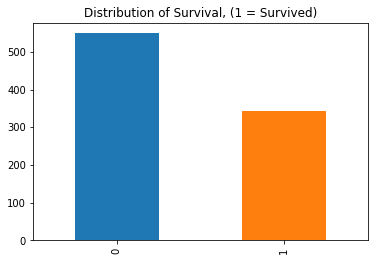

In [486]:
## Trying to find the survival rate###
train_data.Survived.value_counts().plot(kind='bar')
plt.title("Distribution of Survival, (1 = Survived)")

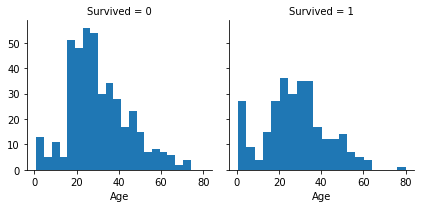

In [487]:
###Binning age by survival rate
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

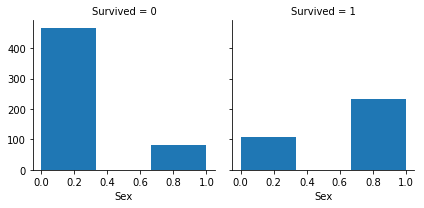

In [488]:
###Binning/Plotting sex by survival rate in order to increase accuracy
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Sex', bins=3)

Text(0.5,1,'Class Distribution')

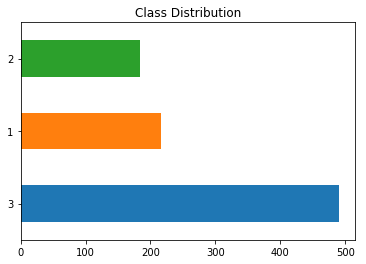

In [489]:
#Plotting class by survival rate
train_data.Pclass.value_counts().plot(kind="barh")
plt.title("Class Distribution")

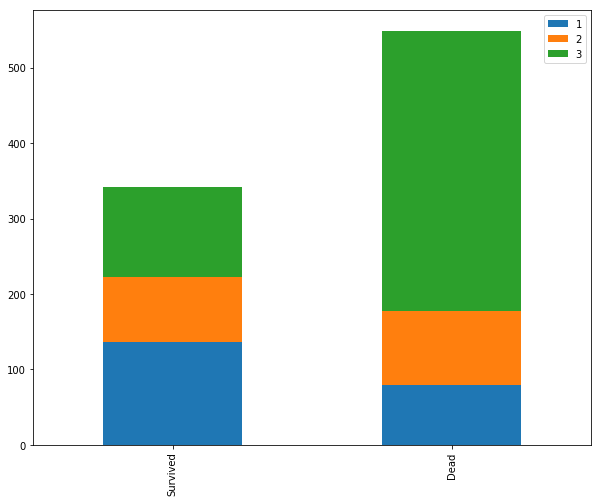

In [490]:
###Trying to determine if death rate by class is proportionally distributed
pclass_survived = train_data[train_data['Survived']==1]['Pclass'].value_counts()
pclass_dead = train_data[train_data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([pclass_survived,pclass_dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(10,8))

Text(0.5,1,'Passengers per boarding location')

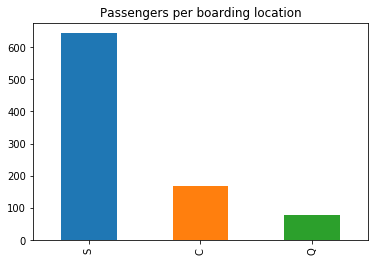

In [491]:
##Passengers per boarding location
train_data.Embarked.value_counts().plot(kind='bar')
plt.title("Passengers per boarding location")

In [492]:
###Correlation analysis
corr = train_data.corr()
print(corr)

            Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived    1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629   
Pclass     -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443   
Sex         0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489   
Age        -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119   
SibSp      -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838   
Parch       0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000   
Fare        0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225   
Embarked_C  0.168240 -0.243292  0.082853  0.036261 -0.059528 -0.011069   
Embarked_Q  0.003650  0.221009  0.074115 -0.022405 -0.026354 -0.081228   
Embarked_S -0.155660  0.081720 -0.125722 -0.032523  0.070941  0.063036   

                Fare  Embarked_C  Embarked_Q  Embarked_S  
Survived    0.257307    0.168240    0.003650   -0.155660  
Pclass     -0.549500   -0.243292    0.221009    0.081720  
Sex     

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


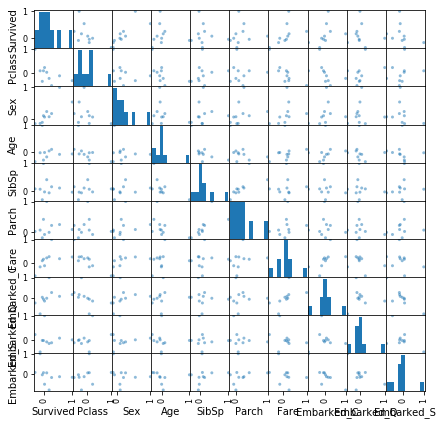

In [493]:
### Shows if the below variables have positive or negative correlations 
pd.scatter_matrix(corr,figsize=(7,7))
plt.show()

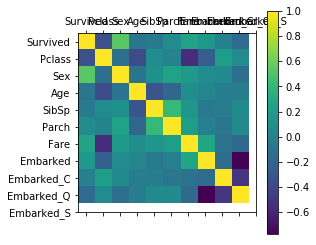

In [494]:
###Shows the strength of correlations
plt.matshow(corr)
plt.xticks(range(len(train_data.columns)), train_data.columns)
plt.yticks(range(len(train_data.columns)), train_data.columns)
plt.colorbar()
plt.show()

In [495]:
###Filling in missing values depending on class and age by computing median value
guess_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        guess_data = train_data[(train_data['Sex'] == i) & (train_data['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_data.median()
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
 
def wrangle_age(dataset):
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    return dataset
 
train_data = wrangle_age(train_data)
test_data = wrangle_age(test_data)

In [496]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null object
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(1), int64(6), object(1), uint8(3)
memory usage: 58.4+ KB
None


In [497]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null int64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Embarked      418 non-null object
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(1), int64(5), object(1), uint8(3)
memory usage: 24.2+ KB
None


In [498]:
mean_fare = 32
test_data['Fare'] = test_data['Fare'].fillna(32)

In [499]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, LabelBinarizer

In [500]:
# One hot encoding the Passenger class n training data set 
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(train_data['Pclass'])
temp1 = pd.DataFrame(lb_results, columns=lb_style.classes_)
print(temp1.shape)

temp1.columns = ['Pclass_1','Pclass_2','Pclass_3']
temp1.head(4)

(891, 3)


,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0


In [501]:
# merging the training data with the one hot encoded data set 
train_data = pd.concat((train_data,temp1),axis = 1)
print(train_data.shape)
print(train_data.head(2))

(891, 14)
   Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Embarked_C  \
0         0       3    0   22      1      0   7.2500        S           0   
1         1       1    1   38      1      0  71.2833        C           1   

   Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0           0           1         0         0         1  
1           0           0         1         0         0  


In [502]:
# One hot encoding the test data set 
# One hot encoding the Passenger class n training data set 
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(test_data['Pclass'])
temp1 = pd.DataFrame(lb_results, columns=lb_style.classes_)
print(temp1.shape)

temp1.columns = ['Pclass_1','Pclass_2','Pclass_3']
temp1.head(4)

(418, 3)


,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1


In [503]:
# merging the testing data with the one hot encoded data set 
test_data = pd.concat((test_data,temp1),axis = 1)
print(test_data.shape)
print(test_data.head(2))

(418, 13)
   Pclass  Sex  Age  SibSp  Parch    Fare Embarked  Embarked_C  Embarked_Q  \
0       3    0   34      0      0  7.8292        Q           0           1   
1       3    1   47      1      0  7.0000        S           0           0   

   Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0           0         0         0         1  
1           1         0         0         1  


#### Trying Standards Scaler for Age and Fare  

In [504]:
# Standard Scaler 
from sklearn.preprocessing import StandardScaler
scalerStd = StandardScaler()

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


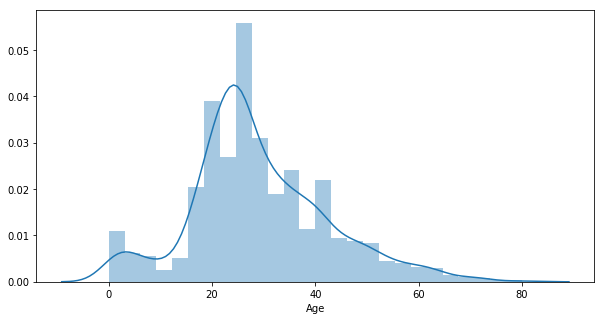

In [505]:
# Age transformation 
plt.rcParams["figure.figsize"] = [10,5]
sns.distplot(train_data['Age'])

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Babu2017/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


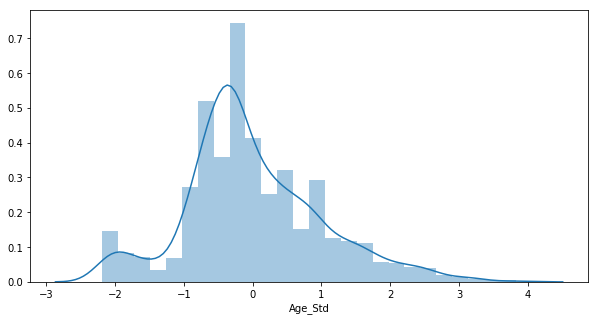

In [506]:
# Age transformation 
train_data['Age_Std'] = scalerStd.fit_transform(train_data[['Age']].values)
plt.rcParams["figure.figsize"] = [10,5]
sns.distplot(train_data['Age_Std'])

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


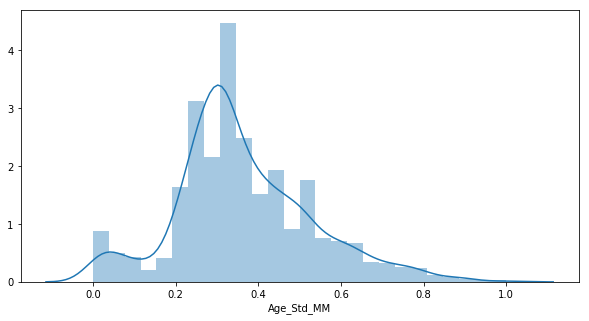

In [507]:
# Age transformation 
train_data['Age_Std_MM'] = scalerMM.fit_transform(train_data[['Age_Std']].values)
plt.rcParams["figure.figsize"] = [10,5]
sns.distplot(train_data['Age_Std_MM'])

#### Fare transformation 

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


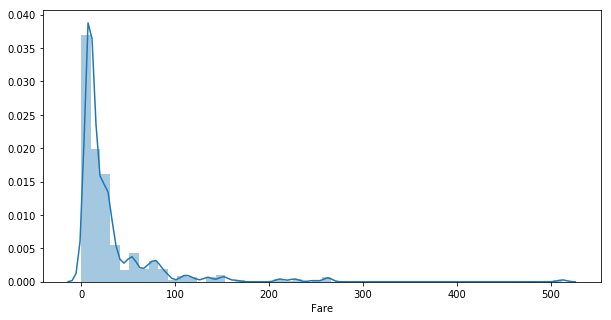

In [508]:
## Fare transformation
plt.rcParams["figure.figsize"] = [10,5]
sns.distplot(train_data['Fare'])

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


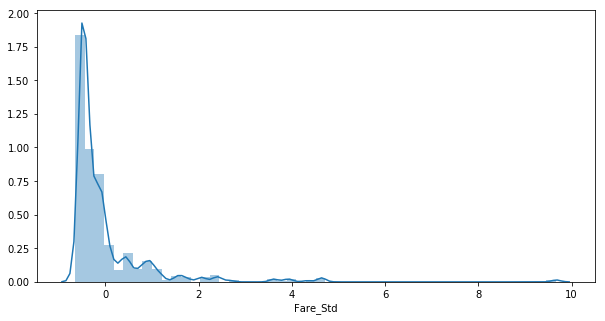

In [509]:
## Fare transformation
train_data['Fare_Std'] = scalerStd.fit_transform(train_data[['Fare']].values)
plt.rcParams["figure.figsize"] = [10,5]
sns.distplot(train_data['Fare_Std'])

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


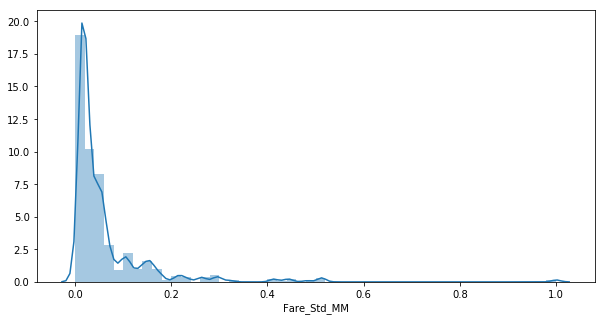

In [510]:
## Fare transformation
train_data['Fare_Std_MM'] = scalerMM.fit_transform(train_data[['Fare_Std']].values)
plt.rcParams["figure.figsize"] = [10,5]
sns.distplot(train_data['Fare_Std_MM'])

#### Transforming test data 

* Age 

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


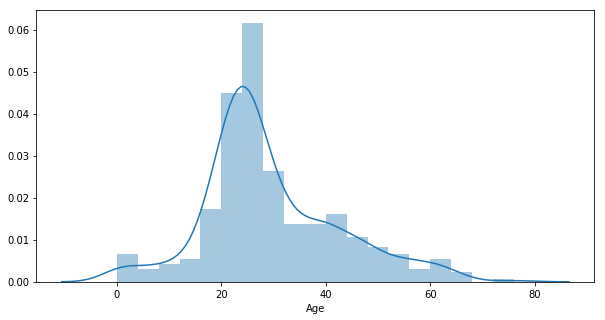

In [511]:
plt.rcParams["figure.figsize"] = [10,5]
sns.distplot(test_data['Age'])

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Babu2017/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


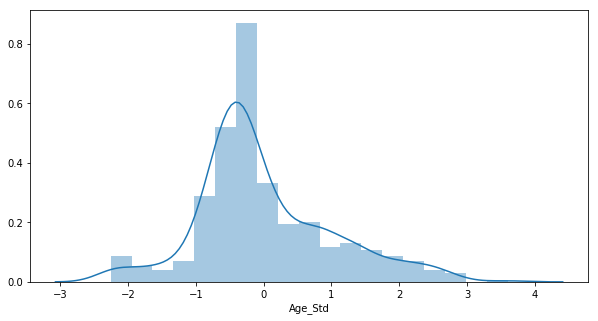

In [512]:
# Doing the same things on Test data set == MinMax scaler on Age and Fare 
# Age transformation 
test_data['Age_Std'] = scalerStd.fit_transform(test_data[['Age']].values)
plt.rcParams["figure.figsize"] = [10,5]
sns.distplot(test_data['Age_Std'])

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


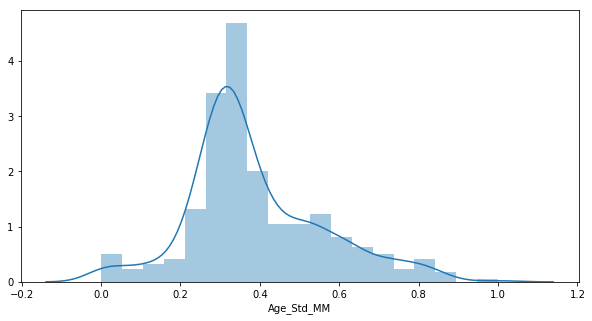

In [513]:
# Age transformation 
test_data['Age_Std_MM'] = scalerMM.fit_transform(test_data[['Age_Std']].values)
plt.rcParams["figure.figsize"] = [10,5]
sns.distplot(test_data['Age_Std_MM'])

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


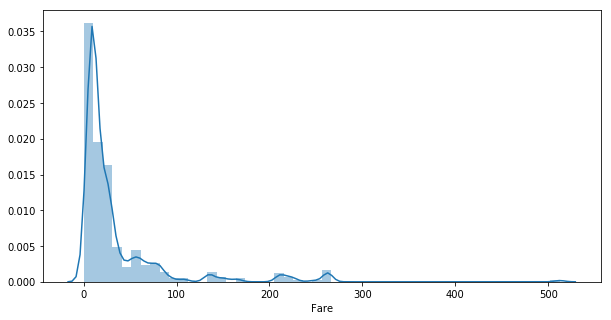

In [514]:
## Fare transformation
plt.rcParams["figure.figsize"] = [10,5]
sns.distplot(test_data['Fare'])

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


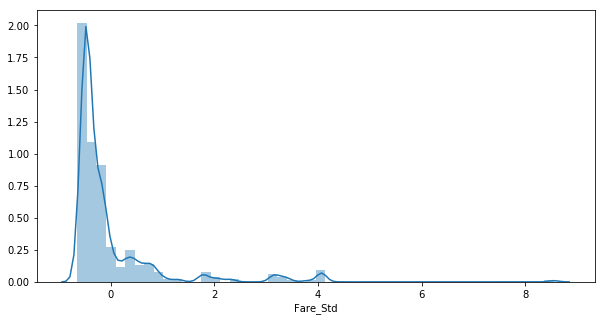

In [515]:
## Fare transformation
test_data['Fare_Std'] = scalerStd.fit_transform(test_data[['Fare']].values)
plt.rcParams["figure.figsize"] = [10,5]
sns.distplot(test_data['Fare_Std'])

/Users/Babu2017/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


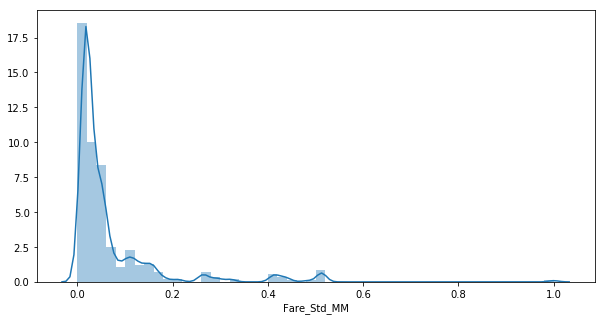

In [516]:
## Fare transformation
test_data['Fare_Std_MM'] = scalerMM.fit_transform(test_data[['Fare_Std']].values)
plt.rcParams["figure.figsize"] = [10,5]
sns.distplot(test_data['Fare_Std_MM'])

#### Dropping unneeded columns 

In [517]:
train_data.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Age_Std', 'Age_Std_MM', 'Fare_Std',
       'Fare_Std_MM'], dtype=object)

In [518]:
dropColsTrain = ['Survived','Pclass','Age','Age_Std','Fare','Fare_Std','Embarked','Parch','Pclass_2',\
                 'Fare_Std_MM','SibSp','Embarked_C', 'Embarked_Q', 'Embarked_S']
dropColsTest = ['Pclass','Age','Age_Std','Fare', 'Fare_Std','Embarked','Parch','Pclass_2',\
                'Fare_Std_MM','SibSp','Embarked_C', 'Embarked_Q', 'Embarked_S']

In [519]:
y = train_data['Survived']
X = train_data.drop(dropColsTrain, axis=1)

## Droping Embarked from test data
test_data = test_data.drop(dropColsTest,axis = 1)

In [520]:
feature_attrs = test_data.columns.values.tolist()
#feature_attrs

#### Building the Model

In [521]:
from sklearn import linear_model

In [522]:
###Training the machine
lm = linear_model.LinearRegression()
model_lm = lm.fit(X,y)

In [523]:
###Testing machine
testLabels = pd.read_csv("/Users/Babu2017/Downloads/titanic/gender_submission.csv")

In [524]:
testLabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [525]:
testLabels_y = testLabels['Survived']

In [526]:
### The output dispplays the accuracy of the machine based on line of regression
model_lm.score(test_data,testLabels_y)

0.6944070704579138

In [527]:
# the intercept
print("Intercept : \n",model_lm.intercept_)
# The coefficients
#print('Coefficients: \n', model_lm.coef_)

Intercept : 
 0.43220137187710833


In [528]:
list(zip(feature_attrs, model_lm.coef_))

[('Sex', 0.4919214195756725),
 ('Pclass_1', 0.19178591910108522),
 ('Pclass_3', -0.19933575341095303),
 ('Age_Std_MM', -0.4357833591424371)]

In [532]:
X.head(3)

,Sex,Pclass_1,Pclass_3,Age_Std_MM
0,0,0,1,0.275
1,1,1,0,0.475
2,1,0,1,0.325


In [534]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64